In [4]:
%run 'init.ipynb'
#%run 'geometry_checks.ipynb'
#%run 'functions.ipynb'

In [ ]:
material = "SS_BellPlate"
isotope_array = [#"U238",
                "Co60",
                "K40",
                #"Cs137",
                #"Th228",
                #"U235",
                #"Th232",
                "Ra226"
                ]
for isotope in isotope_array:
#isotope = "Ra226"
    rootfile = '/userdata/arocchetti/rootfiles/' +'output_'+ material + '_' + isotope +'_FINAL' + '.root'
    #print(rootfile)
    data = get_xyz(rootfile)
#plt.hist(data.Ed, range= (0,2500), bins = 300)
#plt.show()
    print(isotope, max(data.R))

In [198]:
components = ["OuterCryostat_Elongation",
             "OuterCryostatShell", 
             "OuterCryostat_flanges",
             "SS_InnerCryostatShell",
             "SS_InnerCryostatFlanges",
             "SS_InnerCryostat_bottomDome",
             "OuterCryostatReflector",
             "SS_BellPlate",
             "SS_BellSideWall",
             "SS_BellSideWallBottomLip",
             "PmtTpc",
#              "Copper_TopRing",
#              "Copper_LowerRing",
#              "Teflon_Pillar_",
#              "SS_Electrodes",
#              "Teflon_BottomTPC",
#              "Teflon_TPC_Sliding",
#              "Teflon_TPC_Fixed",
#              "Copper_FieldGuard_",
#              "Copper_FieldShaperRing_",
#              "Top_PTFE_Frame",
#              "Copper_BottomPmtPlate",
             "Copper_TopPmtPlate"]

DATE = 'XENONnT_2019-11-19'
DATE = "XENONnT_20191127"
isotope_array = ["U238",
                "Co60",
                "K40",
                "Cs137",
                "Th228",
                "U235",
                "Th232",
                "Ra226"
                ]
num_file = "FINAL"
# num_file = str(1)

In [199]:
N = 100000000
m_fv = 4 #tons

In [200]:
def calculate_events(data, isotope):
    ss = single_scatter(data)
    fv_ = fv(ss)
    energy_ = energy(fv_, 1, 12)
    #en = select_typepri(energy_, isotope)
    #events_df = pd.DataFrame()
    #events_df = pd.concat([events_df, en])
    events_passing = len(energy_)
    if events_passing ==0:
        en_enlarged = energy(fv_, 1, 100)
        events_passing = (len(en_enlarged)*11)/99
        if events_passing == 0:
            events_passing = 2.3
    return events_passing

In [201]:
# components = ["OuterCryostat_Elongation"]
# DATE = "XENONnT_20191125"
# isotope_array = ["Th232"]
# rootfile = "/users/arocchetti/examples/Xenon1T_ER_SS_OuterCryostat_Th232_00007_g4mc_G4p10_Sort.root"
# data = get_xyz(rootfile)

In [202]:
def get_data(isotope, component, N):
    df = pd.DataFrame()
    if component == "OuterCryostatShell":
        material = "SS_OuterCryostat" 
        rootfile = '/userdata/arocchetti/' + DATE + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +  '_' + num_file+'_Sort' + '.root'
        data = get_xyz(rootfile)
        flange1, flange2, flange3, shell, elongation = divide_outercryo(data)
        fraction_shell, fraction_elong, fraction_flanges = outer_cryo_numbers(N)
        df = shell
        frac = fraction_shell
    elif component == "OuterCryostat_Elongation":
        material = "SS_OuterCryostat"
        rootfile = '/userdata/arocchetti/' + DATE + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +  '_' + num_file+'_Sort' + '.root'
        data = get_xyz(rootfile)
        flange1, flange2, flange3, shell, elongation = divide_outercryo(data)
        df = elongation
        fraction_shell, fraction_elong, fraction_flanges = outer_cryo_numbers(N)
        frac = fraction_elong 
    elif component == "OuterCryostat_flanges":
        material = "SS_OuterCryostat"
        rootfile = '/userdata/arocchetti/' + DATE + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +  '_' + num_file+'_Sort' + '.root'
        data = get_xyz(rootfile)
        flange1, flange2, flange3, shell, elongation = divide_outercryo(data)
        flanges = pd.concat([flange1, flange2, flange3])
        df = flanges
        fraction_shell, fraction_elong, fraction_flanges = outer_cryo_numbers(N)
        frac = fraction_flanges
    elif component == "SS_InnerCryostatShell":
        material = "SS_InnerCryostat" 
        rootfile = '/userdata/arocchetti/' + DATE + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +  '_' + num_file+'_Sort' + '.root'
        data = get_xyz(rootfile)
        flange1_in, flange2_in, flange3_in, shell_in, elongation_in = divide_innercryo(data)
        flanges_in = pd.concat([flange1_in, flange2_in, flange3_in])
        fraction_shell, fraction_elong, fraction_flanges = inner_cryo_numbers(N)
        df = shell_in
        frac = fraction_shell
    elif component == "SS_InnerCryostatFlanges":
        material = "SS_InnerCryostat" 
        rootfile = '/userdata/arocchetti/' + DATE + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +  '_' + num_file+'_Sort' + '.root'
        data = get_xyz(rootfile)
        flange1_in, flange2_in, flange3_in, shell_in, elongation_in = divide_innercryo(data)
        flanges_in = pd.concat([flange1_in, flange2_in, flange3_in])
        fraction_shell, fraction_elong, fraction_flanges = inner_cryo_numbers(N)
        df = flanges_in
        frac = fraction_flanges
    elif component == "SS_InnerCryostat_bottomDome":
        material = "SS_InnerCryostat" 
        rootfile = '/userdata/arocchetti/' + DATE + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +  '_' + num_file+'_Sort' + '.root'
        data = get_xyz(rootfile)
        flange1_in, flange2_in, flange3_in, shell_in, elongation_in = divide_innercryo(data)
        flanges_in = pd.concat([flange1_in, flange2_in, flange3_in])
        fraction_shell, fraction_elong, fraction_flanges = inner_cryo_numbers(N)
        frac = fraction_elong
        df = elongation_in
    elif component == "SS_BellSideWall":
        material = 'SS_BellSideWall'
        rootfile = '/userdata/arocchetti/' + DATE + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +  '_' + num_file+'_Sort' + '.root'
        data = get_xyz(rootfile)
        bottomLip, bellWall = divide_bellWall(data)
        fraction_side, fraction_lip = bell_wall_numbers(N)
        frac = fraction_side
        df = bellWall
    elif component == "SS_BellSideWallBottomLip":
        material = 'SS_BellSideWall'
        rootfile = '/userdata/arocchetti/' + DATE + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +  '_' + num_file+'_Sort' + '.root'
        data = get_xyz(rootfile)
        bottomLip, bellWall = divide_bellWall(data)
        df = bottomLip 
        fraction_side, fraction_lip = bell_wall_numbers(N)
        frac = fraction_lip
    elif component == "SS_Electrodes":
        material = 'SS_AnodeRing'
        rootfile = '/userdata/arocchetti/' + DATE + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +  '_' + num_file+'_Sort' + '.root'
        data = get_xyz(rootfile)
        frac = 1
    elif component == "Top_PTFE_Frame":
        material = 'SS_Teflon_TopElectrodesFrame'
        rootfile = '/userdata/arocchetti/' + DATE + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +  '_' + num_file+'_Sort' +  
        data = get_xyz(rootfile)
        frac = 1
    elif component ==  "Teflon_TPC_Sliding":
        material = "Teflon_TPC"
        rootfile = '/userdata/arocchetti/' + DATE + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +  '_' + num_file+'_Sort' + '.root'
        df = get_xyz(rootfile)
        frac = 1
    elif component ==  "Teflon_TPC_Fixed":
        material = "Teflon_TPC"
        rootfile = '/userdata/arocchetti/' + DATE + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +  '_' + num_file+'_Sort' + '.root'
        df = get_xyz(rootfile)
        frac = 1
    else:
        material = component
        rootfile = '/userdata/arocchetti/' + DATE + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +  '_' + num_file+'_Sort' + '.root'
        df = get_xyz(rootfile)
        frac = 1
    return df, frac

In [203]:
data, fr = get_data("K40", "Copper_TopRing", 1000)
data.head()

xp          yp      zp_uc  epri  ns           X  \
entry subentry                                                            
0     0        -666.624756  178.060883 -27.779388   0.0   2 -427.106506   
      1        -666.624756  178.060883 -27.779388   0.0   2 -436.846619   
1     0         540.450928 -434.231873 -25.906849   0.0   3  244.099045   
      1         540.450928 -434.231873 -25.906849   0.0   3  238.082687   
      2         540.450928 -434.231873 -25.906849   0.0   3  239.870209   

                         Y        Z_uc          Ed          rp           r2p  \
entry subentry                                                                 
0     0         133.662521 -231.064590  762.737671  689.995850  476094.28125   
      1         143.970093 -253.635529  312.678284  689.995850  476094.28125   
1     0        -387.979675 -210.152740  925.397827  693.285339  480644.56250   
      1        -386.296417 -225.682434  368.434021  693.285339  480644.56250   
      2        -386.885468 -216.941544  166.990463  693.285339  480644.56250   

                         R             R2           Z          zp  
entry subentry                                                     
0     0         447.532837  200285.640625  512.935425  716.220581  
      1         459.959076  211562.343750  490.364471  716.220581  
1     0         458.380371  210112.562500  533.847290  718.093140  
      1         453.771179  205908.281250  518.317566  718.093140  
      2         455.212128  207218.078125  527.058472  718.093140

In [204]:
def do(component, m_fv): 
   
    conv = 3.15*1e7
    rate_array = []
    error_array = []
    i = 0
    flag = 0
    total_str = ""  
    E = 11
    time_array = []
    
    for i in range(0, len(isotope_array)):
        isotope = isotope_array[i]
        data, frac = get_data(isotope, component, N)
        
        #n = select_typepri(data, isotope)-------> in case other type pri function 
        b = select_typepri(data, isotope) #later on with the good function
        n =  N*(frac/100)*(1/b) #n_gen * fraction in that component * chain_factor
        n_events = calculate_events(data, isotope)
        p = get_parameters(component)
        mass = p['mass']
        contamination = p[isotope] 
        err = "err_"+isotope
        err = str(err)
        error_cont = p[err]/1000
        
        if (contamination == 0):
            rate = 0
            error_rate = 0
            str_ = ( "| no contamination value ")
            alpha = 0
            time = 0

        else:
            contamination = p[isotope]/1000 
            time = n / (mass * contamination)
            rate = n_events/(time * m_fv ) #*E  #ev/s*t
            alpha = mass / (m_fv * n) #correct with mass*b/(m_fv*E*N_gen)  ##no energy  
            err = "err_"+isotope
            err = str(err) 
            error_rate = alpha * np.sqrt((n_events * error_cont)**2 + (contamination*np.sqrt(n_events))**2)
            if n_events == 2.3: 
                str_ = ("|<%4.4f" %(rate*conv))
                flag = flag +1
            else:
                str_ = ("|(%4.4f +- %4.4f)" %(rate*conv, error_rate*conv))
            
        rate_array = np.append(rate_array, rate)
        error_array = np.append(error_array, error_rate) 
        total_str = total_str  + str_ 
        
        if time == 0:
            time_array = time_array = np.append(time_array, time)  
        else:
            time_array = time_array = np.append(time_array, time/conv)
        
        i = i+1 
        tot_rate = 0
        tot_error_rate = 0
        if len(rate_array)!=0:
            for i in range(0, len(rate_array)):
                tot_rate = tot_rate + rate_array[i]
                tot_error_rate = tot_error_rate + error_array[i]
                if flag == 0:
                    total_rate_string = ("|(**%4.4f +- %4.4f)" %(tot_rate*conv, tot_error_rate*conv)+ "**|" )
                else:
                    total_rate_string = ("|**<%4.4f " %(tot_rate*conv)+ "**|") 
        else:
            total_rate_string = "|"        
    print("|" + component + total_str + total_rate_string)
    return tot_rate*conv, time_array
    
####################################################################################

In [205]:
# data, fr = get_data("U238", "Copper_TopRing", 1000)
# do("Copper_BottomPmtPlate", 4)
# print(time)
# type(time)

In [206]:

dict = {
    "hello":33,
}
ciao = "ciaociao"
dict2 = {ciao:20}
dict.update(dict2)
print(dict)

{'hello': 33, 'ciaociao': 20}


In [207]:
#components = ["OuterCryostat_Elongation",
#             "OuterCryostatShell"]
dict_times = {
        "isotope_string" : "U238 ^ Co60 ^ K40 ^ Cs137 ^ Th228 ^ U235 ^ Th232 ^ Ra226"
    }
def print_results(m_fv):
    total_rate = []
    times = []
    print("^material ^", isotope_array[0], "^", isotope_array[1], "^", isotope_array[2], "^",isotope_array[3], "^", isotope_array[4],"^",
             isotope_array[5], "^",isotope_array[6], "^",isotope_array[7], "^ Tot ^", )
    for component in components:
        tot_rate_per_comp, time = do(component, m_fv)
        total_rate = np.append(total_rate, tot_rate_per_comp)
        dict_ = {component : time}
        dict_times.update(dict_)
    return dict_times
    print("^Tot.^^^^^^^^^", "%4.4f" %(sum(total_rate)), "ev/t*y^")     

print_results(m_fv) 
# print(dict_times)

^material ^ U238 ^ Co60 ^ K40 ^ Cs137 ^ Th228 ^ U235 ^ Th232 ^ Ra226 ^ Tot ^


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


|OuterCryostat_Elongation|<3.1029|(0.1234 +- 0.0720)|(0.0420 +- 0.0632)|(0.0005 +- 0.0011)|(0.2691 +- 0.2706)|<0.5290|(2.7319 +- 2.7319)|(0.1808 +- 0.3837)|**<6.9797 **|
|OuterCryostatShell|<2.3211|(4.0787 +- 1.8548)|(0.1009 +- 0.1514)|(0.0120 +- 0.0254)|(0.1413 +- 0.1730)|(0.0113 +- 0.0341)|(0.0196 +- 0.0420)|(0.2153 +- 0.3229)|**<6.9001 **|
|OuterCryostat_flanges|<1.3263|<7.0675|<1.0611|<0.2842|<5.9686|<0.1251|<0.1990|<0.6821|**<16.7139 **|
|SS_InnerCryostatShell|<2.5643|<0.3271|<0.2218|<0.0291|<0.4851|<1.0673|<0.0693|<0.3742|**<5.1383 **|
|SS_InnerCryostatFlanges|<2.5724|<13.7072|<2.0579|<0.5512|<11.5758|<0.2425|<0.3859|<1.3229|**<32.4159 **|
|SS_InnerCryostat_bottomDome|<1.0600|<0.0323|<0.0742|<0.0018|<0.2115|<0.1807|<2.1466|<0.6392|**<4.3464 **|
|OuterCryostatReflector|(2.1601 +- 1.1620)| no contamination value | no contamination value | no contamination value |(0.0137 +- 0.0615)|(0.1047 +- 0.0632)|(1.2344 +- 4.1277)| no contamination value |(**3.5129 +- 5.4144)**|
|SS_BellPlate|<

{'isotope_string': 'U238 ^ Co60 ^ K40 ^ Cs137 ^ Th228 ^ U235 ^ Th232 ^ Ra226',
 'OuterCryostat_Elongation': array([1.85310741e-01, 6.07576199e+00, 2.64729629e+00, 1.09006318e+02,
        9.28875892e-01, 1.08686651e+00, 9.15114768e-02, 3.07314661e-01]),
 'OuterCryostatShell': array([0.24773077, 0.30647106, 1.10102565, 4.64495198, 1.17967034,
        2.4568341 , 2.83120882, 0.51610578]),
 'OuterCryostat_flanges': array([0.43352076, 0.08135778, 0.54190095, 2.02309689, 0.09633795,
        4.59794747, 2.89013841, 0.84295704]),
 'SS_InnerCryostatShell': array([ 0.22423227,  1.75775296,  2.59268561, 19.75379516,  1.18522771,
         0.53873987,  8.29659397,  1.53640629]),
 'SS_InnerCryostatFlanges': array([0.22352705, 0.04194878, 0.27940881, 1.04312622, 0.04967268,
        2.3707414 , 1.49018031, 0.43463592]),
 'SS_InnerCryostat_bottomDome': array([5.42428812e-01, 1.77845512e+01, 7.74898302e+00, 3.19075772e+02,
        2.71894141e+00, 3.18140066e+00, 2.67866080e-01, 8.99550268e-01]),
 'Outer

working on: OuterCryostat_Elongation


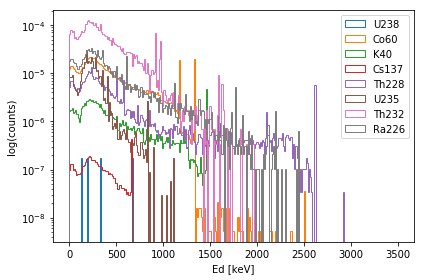

working on: OuterCryostatShell


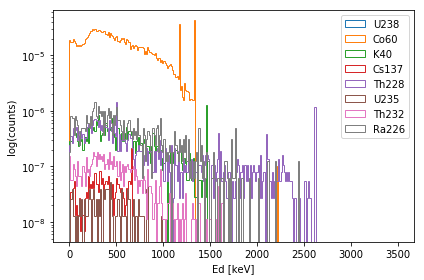

working on: OuterCryostat_flanges


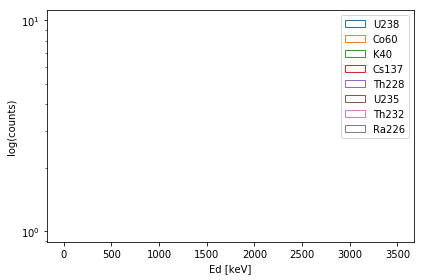

working on: SS_InnerCryostatShell


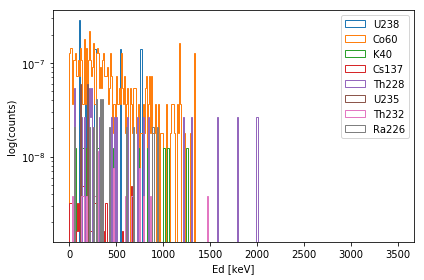

working on: SS_InnerCryostatFlanges


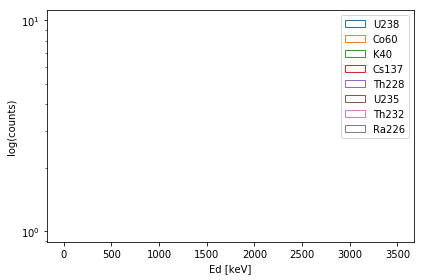

working on: SS_InnerCryostat_bottomDome


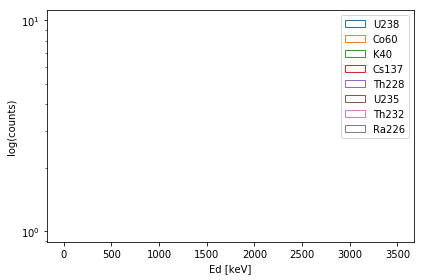

working on: OuterCryostatReflector
no contamination
no contamination
no contamination
no contamination


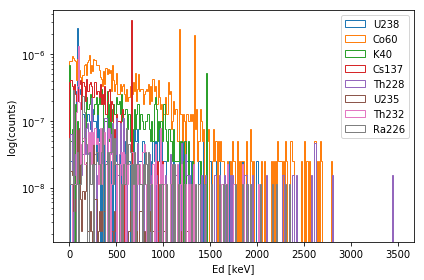

working on: SS_BellPlate


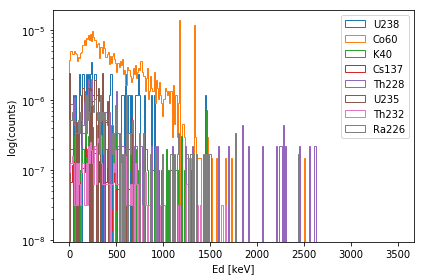

working on: SS_BellSideWall


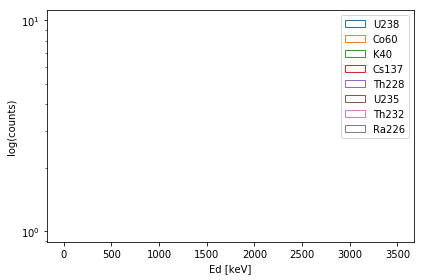

working on: SS_BellSideWallBottomLip


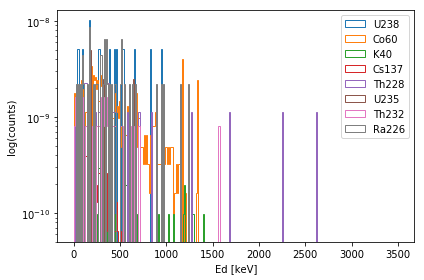

working on: PmtTpc


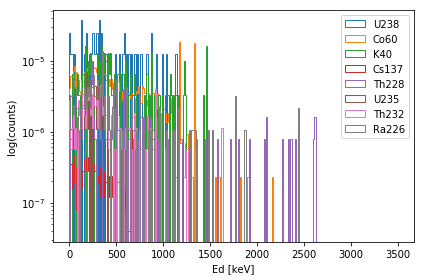

working on: Copper_TopPmtPlate
no contamination
no contamination
no contamination
no contamination
no contamination
no contamination
no contamination
no contamination


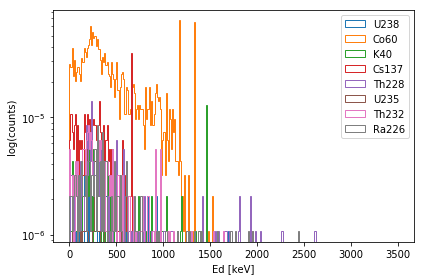

In [209]:
###plot spectrum per component 
def plot_spectrum(data, min,max, bins, isotope, time):
    time_weights = [1/time]*len(data)
    plt.hist(data.Ed, bins = bins, range = (min, max), weights = time_weights, histtype = 'step', label = isotope)
    plt.ylabel('log(counts)')
    plt.xlabel('Ed [keV]')
    plt.yscale('log')
    plt.tight_layout()
    plt.legend()
    
for component in components:
    print("working on:" , component)
    for i in range(0, len(isotope_array)):
        isotope = isotope_array[i]
        data, frac = get_data(isotope, component, N)
        b = select_typepri(data, isotope) #later on with the good function
        n =  N*(frac/100)*(1/b) #n_gen * fraction in that component * chain_factor
        p = get_parameters(component)
        mass = p['mass']
        contamination = p[isotope] 
        if contamination > 0:
            contamination = p[isotope]/1000 
            time = n / (mass * contamination)
        else:          
            print("no contamination")
        
        plot_spectrum(data, 0, 3500, 300, isotope, time) 
    plt.show()

In [219]:
# plot spectrum per material 

def plot_total_contribution(bins, min_val, max_val ):
    conv = 3.15*1e7 #sec->year
    bins_ = bins 
    min_ = min_val
    max_ = max_val
    values = np.zeros(bins) 
    for component in components:
        print("working on:" , component)
        for i in range(0, len(isotope_array)):
            n =0
            isotope = isotope_array[i]
            data, frac = get_data(isotope, component, N)
            b = select_typepri(data, isotope) #later on with the good function
            n =  N*(frac/100)*(1/b) #n_gen * fraction in that component * chain_factor
            p = get_parameters(component)
            mass = p['mass']
            contamination = p[isotope] 
            if contamination > 0:
                contamination = p[isotope]/1000 
                time = n / (mass * contamination)
            else:          
                print("no contamination for ", isotope)
            time_weights = [1/time]*len(data)
            n, bins_plt, _ = plt.hist(data.Ed, bins = bins_, range = (min_, max_), weights = time_weights, 
                                      histtype = "step", label = ("%s %s"%(component, isotope)))            
            #plt.yscale("log") 
            values = values+n 
    return values, bins_plt


values, bins_plt = plot_total_contribution(300, 0, 500 )
plt.plot(bins_plt[:-1], values, "black", label = "tot")
plt.legend(markerscale=10, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.yscale("log")
plt.ylabel("rate")

plt.xlabel("Energy [keV]")
plt.title("ER from materials")
plt.show() 

SyntaxError: invalid syntax (<ipython-input-219-c7f6ac7d32bd>, line 32)

working on: OuterCryostat_Elongation
working on: OuterCryostatShell
working on: OuterCryostat_flanges
working on: SS_InnerCryostatShell
working on: SS_InnerCryostatFlanges
working on: SS_InnerCryostat_bottomDome
working on: OuterCryostatReflector
no contamination for  Co60
no contamination for  K40
no contamination for  Cs137
no contamination for  Ra226
working on: SS_BellPlate
working on: SS_BellSideWall
working on: SS_BellSideWallBottomLip
working on: PmtTpc
working on: Copper_TopPmtPlate
no contamination for  U238
no contamination for  Co60
no contamination for  K40
no contamination for  Cs137
no contamination for  Th228
no contamination for  U235
no contamination for  Th232
no contamination for  Ra226


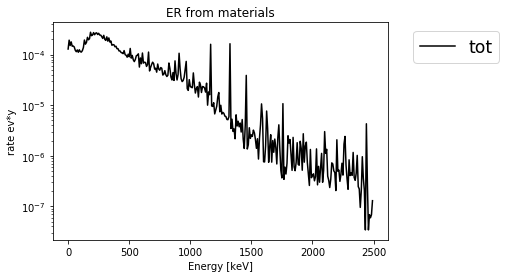

In [222]:
def plot_total_contribution(bins, min_val, max_val ):

    bins_ = bins 
    min_ = min_val
    max_ = max_val
    values = np.zeros(bins) 
    for component in components:
        print("working on:" , component)
        for i in range(0, len(isotope_array)):
            isotope = isotope_array[i]
            data, frac = get_data(isotope, component, N)
            b = select_typepri(data, isotope) #later on with the good function
            n =  N*(frac/100)*(1/b) #n_gen * fraction in that component * chain_factor
            p = get_parameters(component)
            mass = p['mass']
            contamination = p[isotope] 
            if contamination > 0:
                contamination = p[isotope]/1000 
                time = n / (mass * contamination)
            else:          
                print("no contamination for ", isotope)
            time_weights = [1/time]*len(data)
            n, bins_plt, = np.histogram(data.Ed, bins = bins_, range = (min_, max_), weights = time_weights)            
            plt.yscale("log")              
            values = values + n
    return values, bins_plt

conv = 3.15*1e7
for i in range (0, len(values)):
    values[i] = values[i]*conv
values, bins_plt = plot_total_contribution(300, 0, 2500 )
plt.plot(bins_plt[:-1], values, "black", label = "tot")
plt.legend(markerscale=10, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='xx-large')
plt.yscale("log")
plt.ylabel("rate [ev*y]ls")

plt.xlabel("Energy [keV]")
plt.title("ER from materials")
plt.show() 

(array([ 2., 17., 38., 32.,  7.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <a list of 20 Patch objects>)

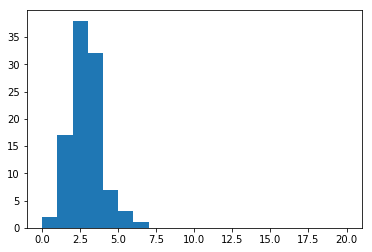

In [258]:
plt.hist(s, bins = 20, range = (0,20))

(array([ 5. , 28.8, 68.8, 64.6, 28.4,  4.2,  0.2,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <a list of 20 Patch objects>)

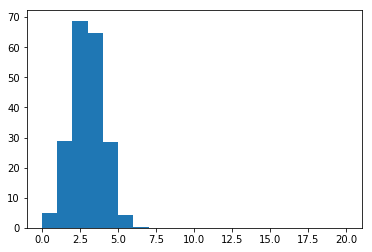

In [208]:
plt.hist(s, bins = 20, range = (0,20), weights = b)

[0 5 0 5 0 5 0 5 0 5 0 0 0 0 0 0 0 0 0 0]
[0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
